In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#inputs 
inputs_xor = np.array([[0,0], [0,1],[1,0],[1,1]])
exp_output_xor = np.array([[0],[1],[1],[0]])

inputs_nand = np.array([[0,0], [0,1],[1,0],[1,1]])
exp_output_nand = np.array([[1],[1],[1],[0]])

In [12]:
def sigmoid (x):
    return 1/(1+np.exp(-x))

In [13]:
def sigmoid_derivative (x):
    return x*(1-x)

In [14]:
def train(inputs, exp_output, epochs = 10000, learning_rate = 0.1):
    input_layer_neurons = 2
    hidden_layer_neurons = 2
    output_layer_neurons = 1
    
    hidden_layer_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
    hidden_bias = np.random.uniform(size=(1,hidden_layer_neurons))
    output_layer_weight = np.random.uniform(size=(hidden_layer_neurons,output_layer_neurons))
    output_bias = np.random.uniform(size=(1,output_layer_neurons))
    
    loss = []
    epochs_arr = []
    
    for epoch in range(epochs):
        hidden_layer_activation = np.dot(inputs, hidden_layer_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)
        
        output_layer_activation = np.dot(hidden_layer_output, output_layer_weight)
        output_layer_activation += output_bias
        
        predicted_output = sigmoid(output_layer_activation)
        
        #error 
        error = exp_output - predicted_output
        derivative_predicted_output = error*sigmoid_derivative(predicted_output)
        
        error_hidden_layer = derivative_predicted_output.dot(output_layer_weight.T)
        derivative_hidden_layer_output = error_hidden_layer*sigmoid_derivative(hidden_layer_output)
        
        output_layer_weight += hidden_layer_output.T.dot(derivative_predicted_output) * learning_rate
        output_bias += np.sum(derivative_predicted_output, axis=0 , keepdims=True) * learning_rate
        hidden_layer_weights += inputs.T.dot(derivative_hidden_layer_output) * learning_rate
        hidden_bias += np.sum(derivative_hidden_layer_output, axis=0, keepdims=True) * learning_rate
        
        epochs_arr.append(epoch+1)
        loss.append(np.sum(error))
     
    return epochs_arr, loss

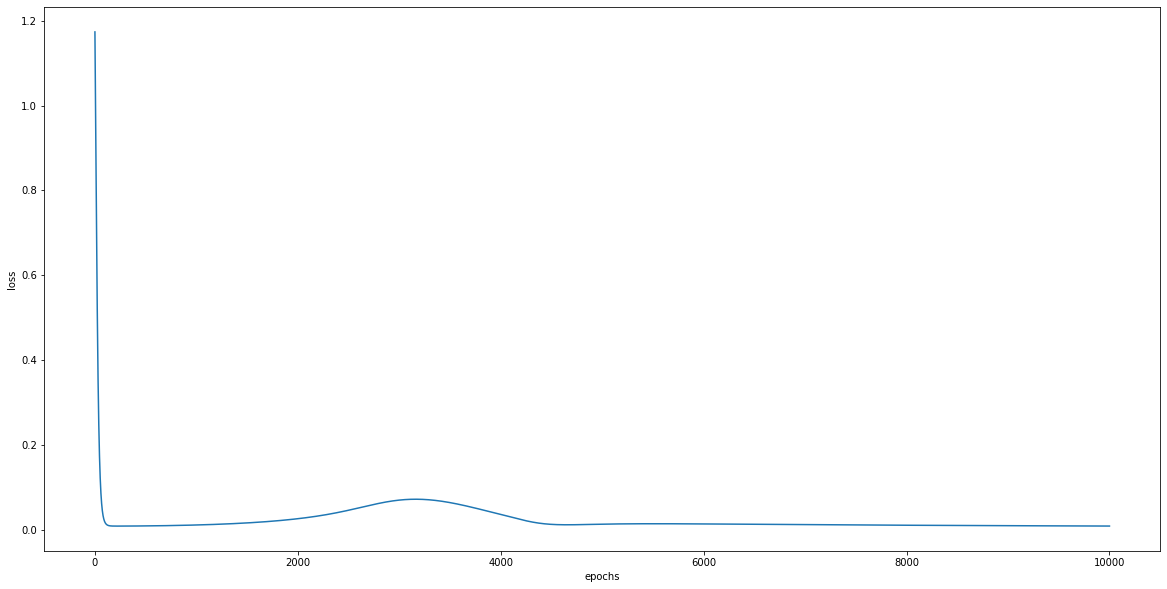

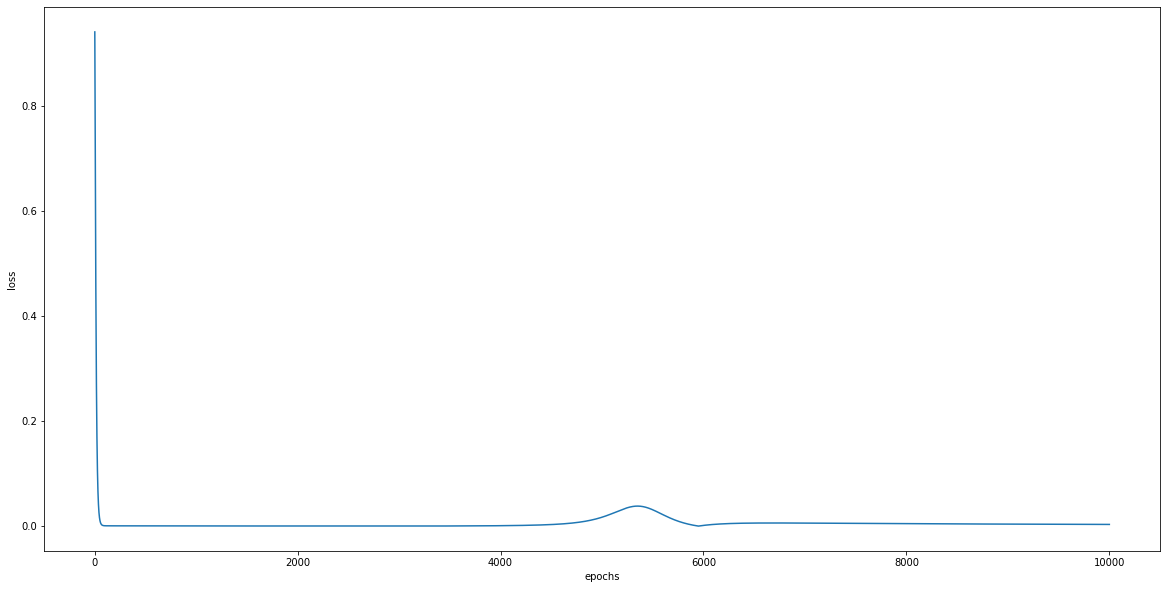

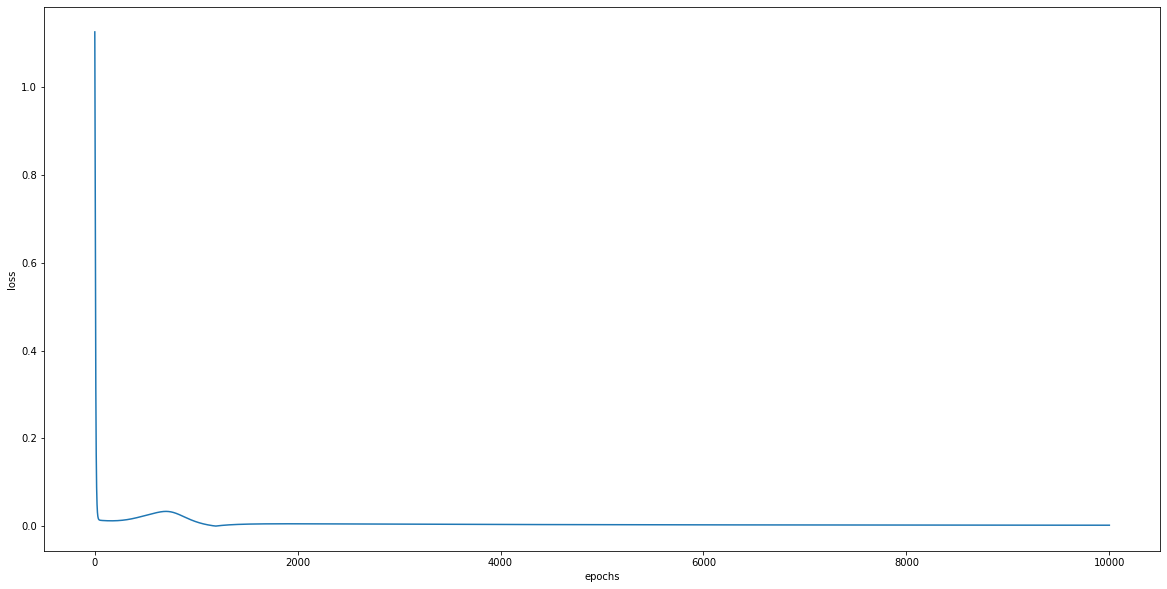

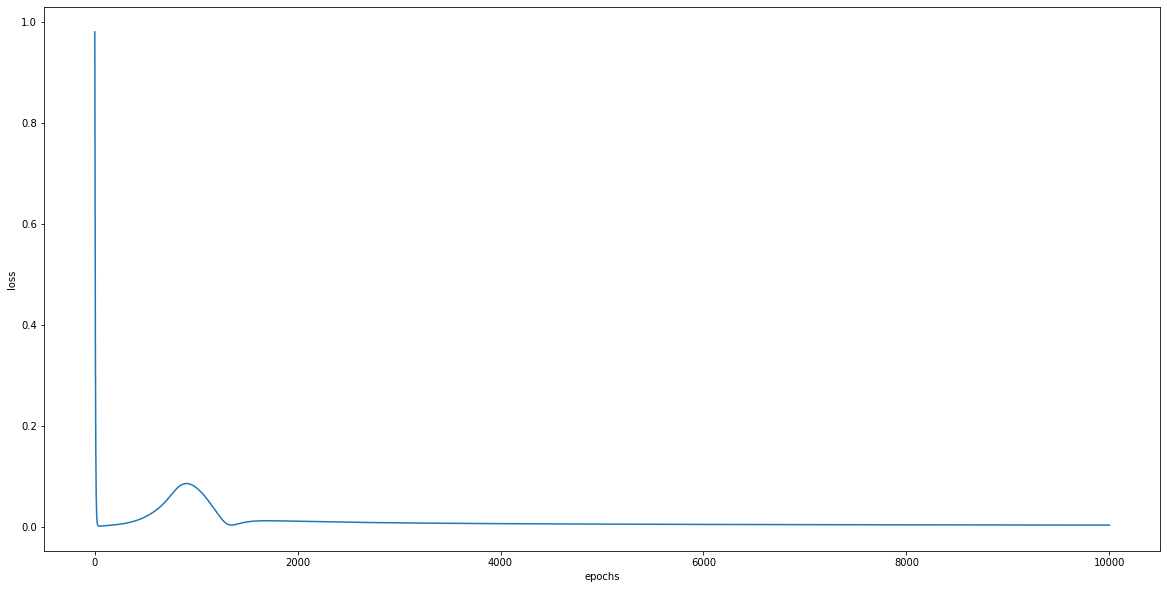

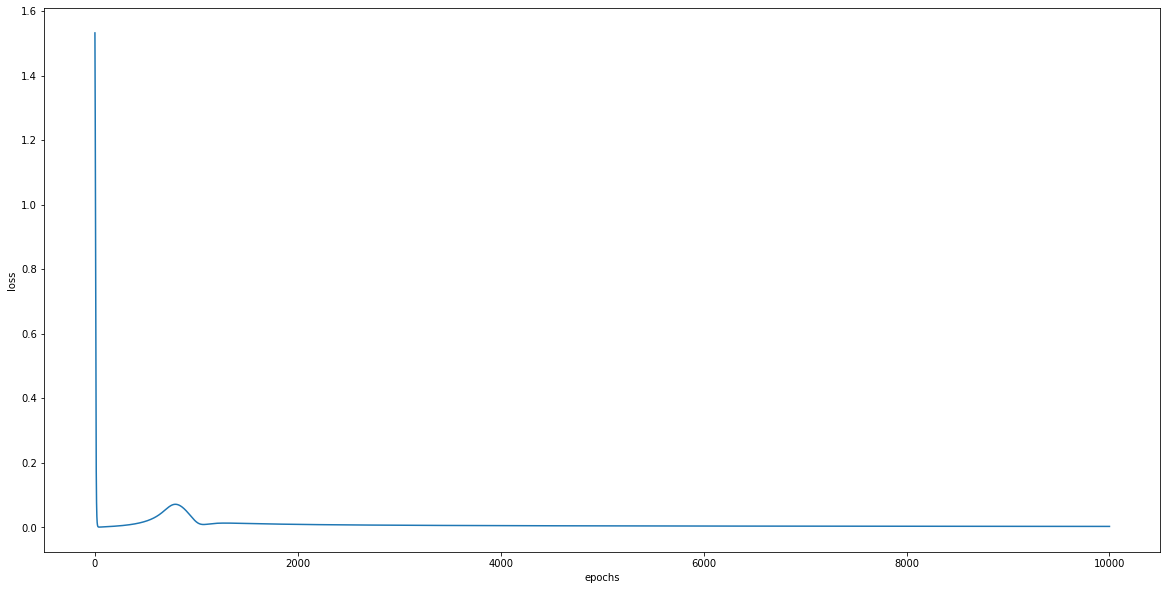

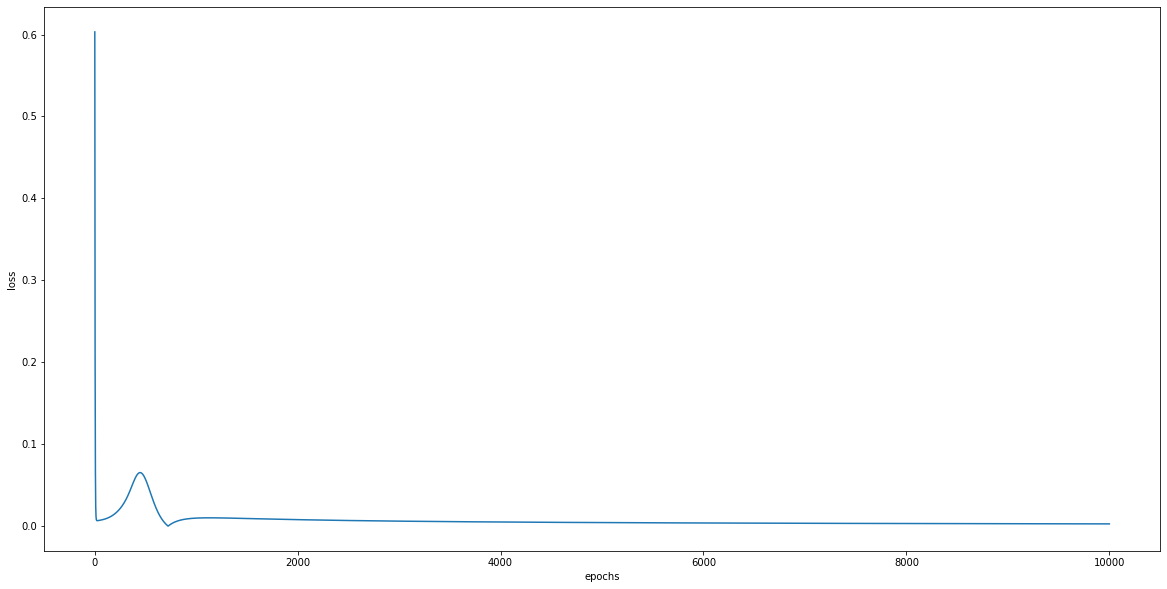

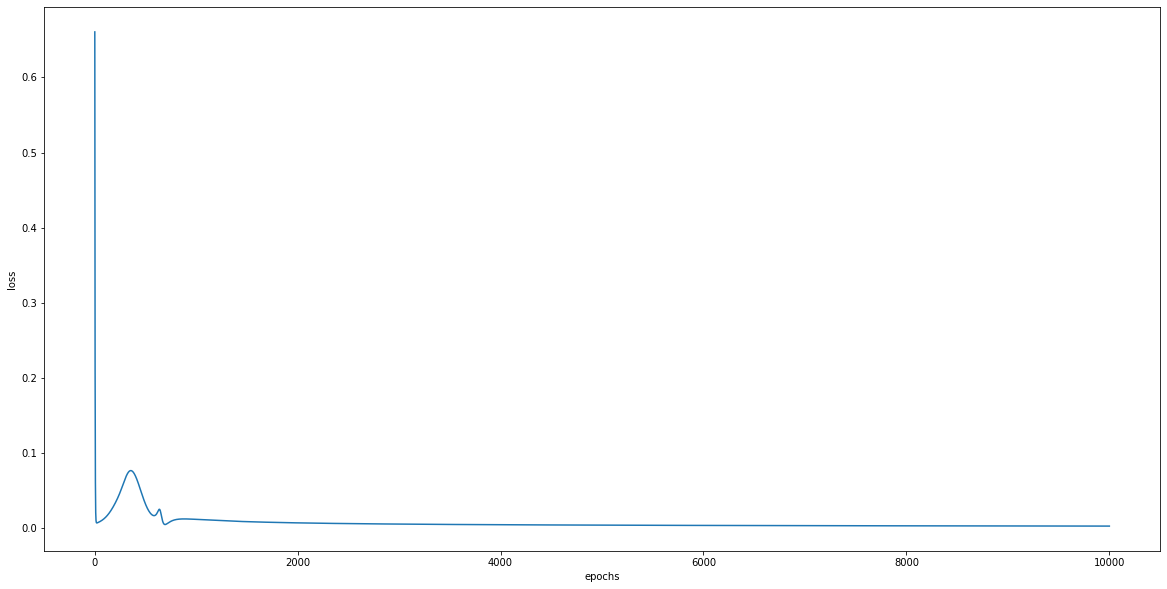

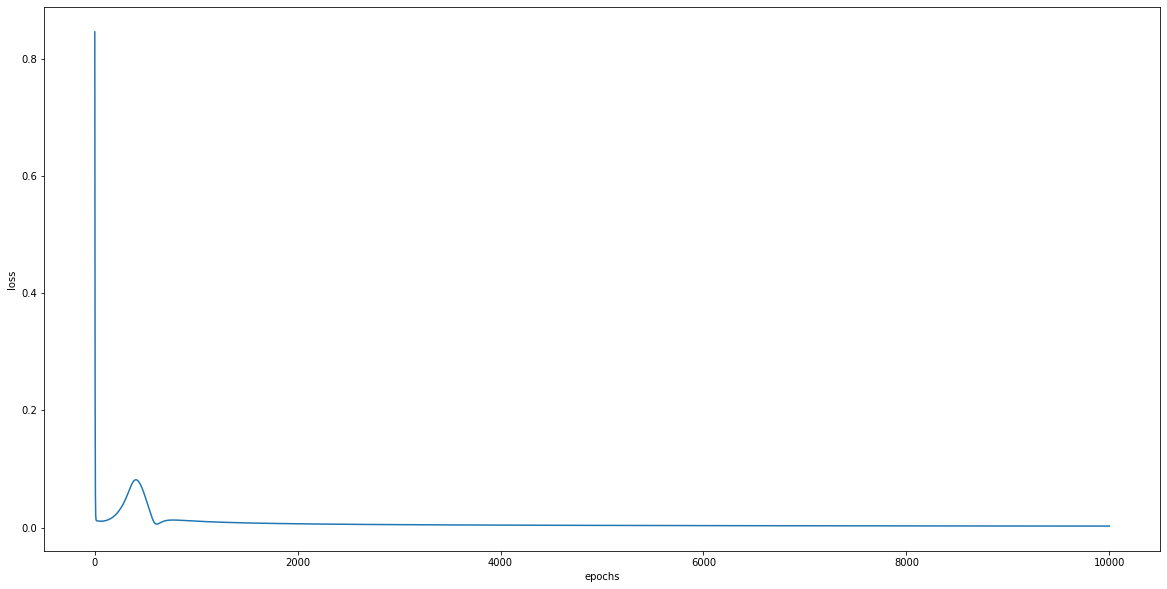

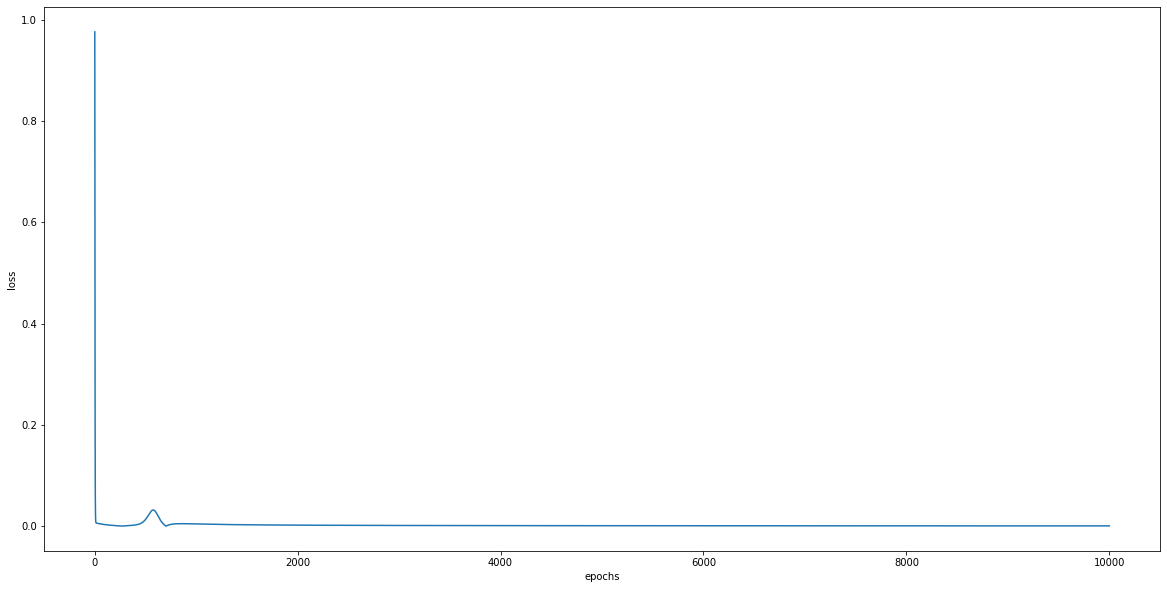

In [15]:
#XOR

loss_lr_data = []
lr_val = []

for lr in range(9):
    epochs_arr , loss = train(inputs_xor, exp_output_xor, learning_rate=(lr+1)/10)
    loss = np.absolute(loss)
    
    lr_val.append((lr+1)/10)
    loss_lr_data.append(loss[-1])
    
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20,10]
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epochs_arr, loss)
    plt.show()

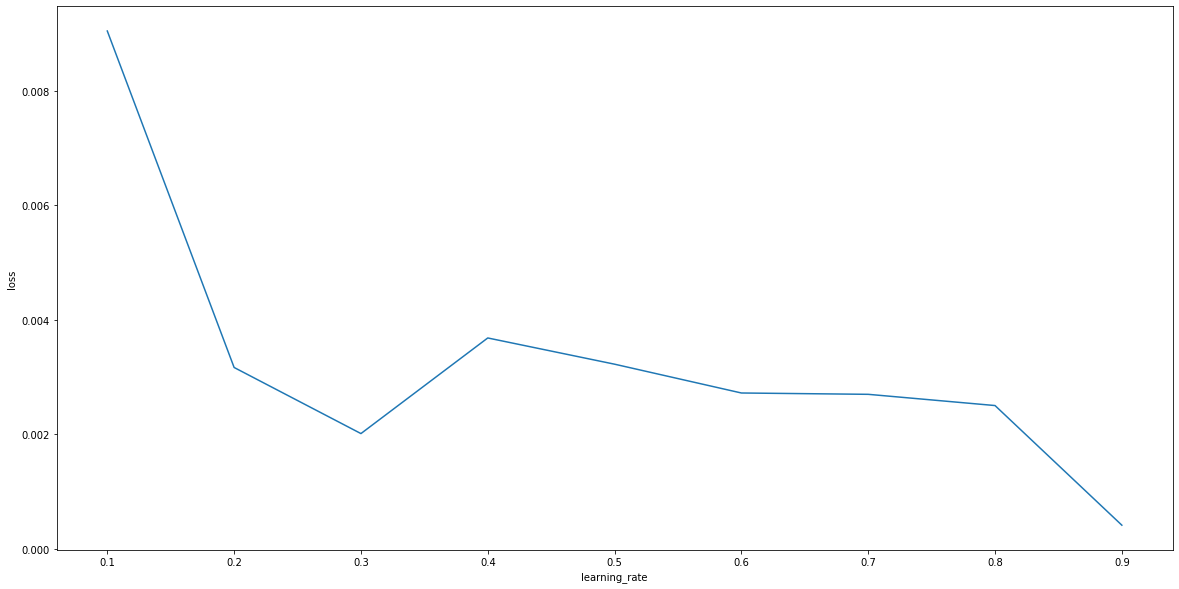

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.plot(lr_val, loss_lr_data)
plt.show()    

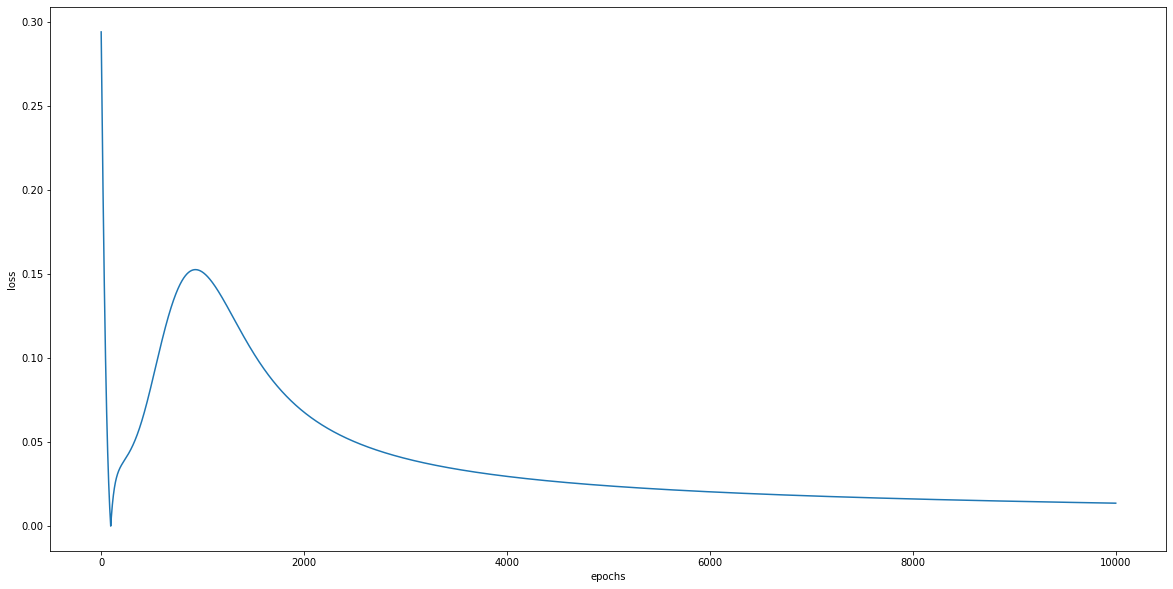

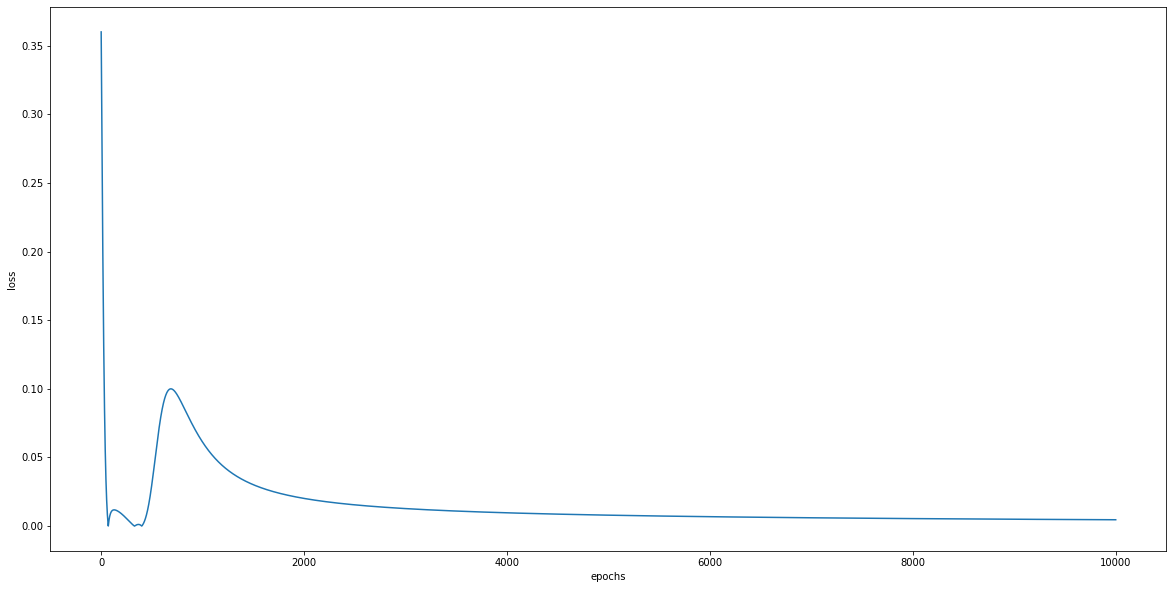

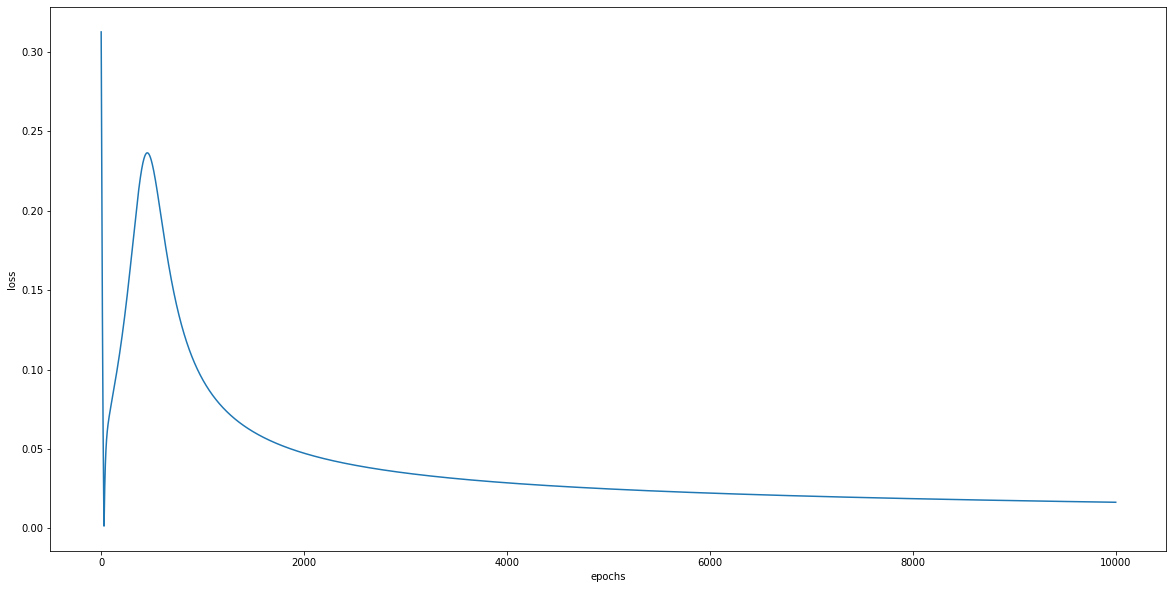

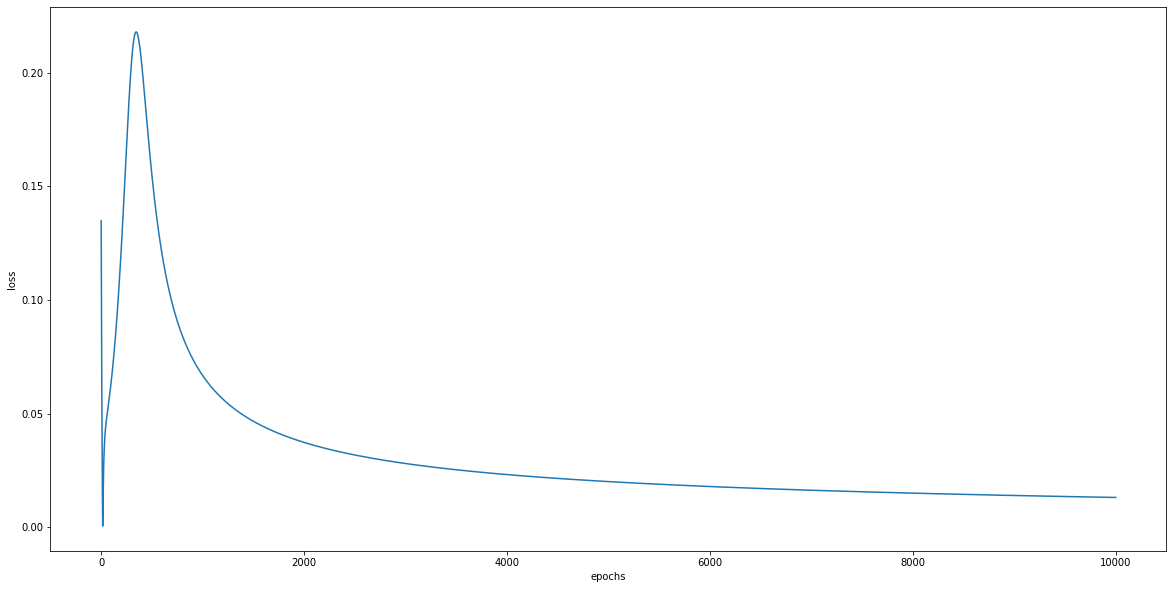

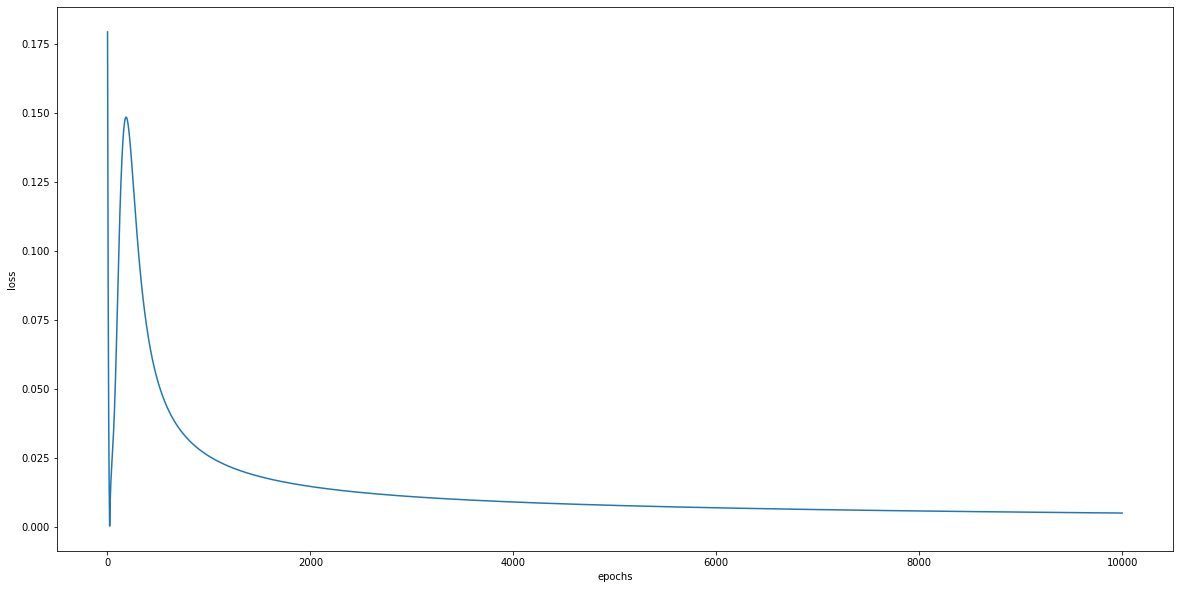

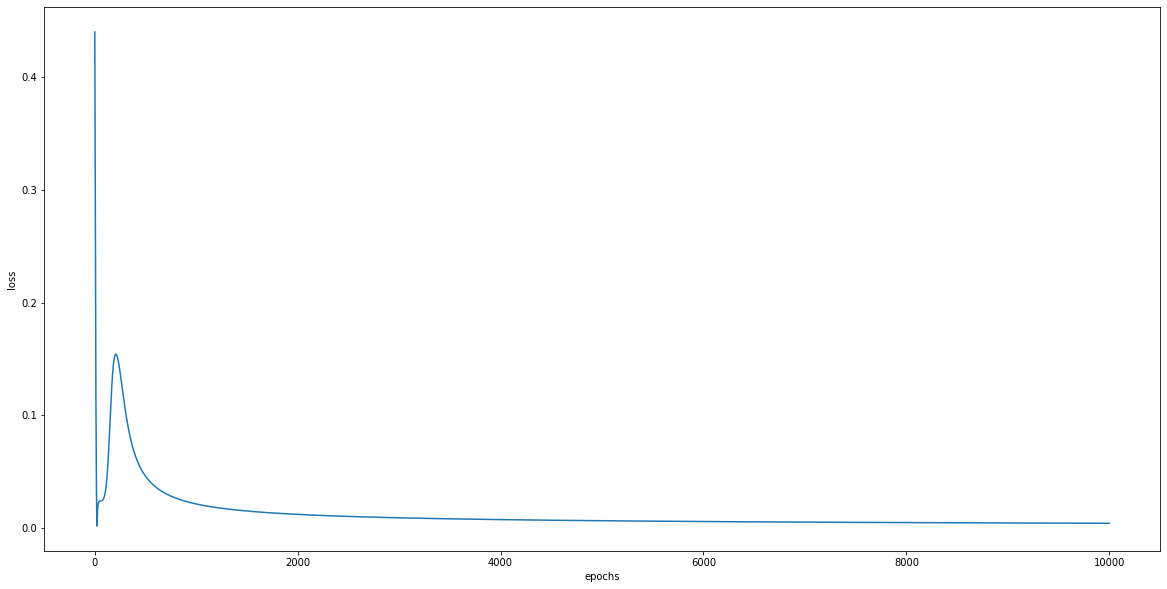

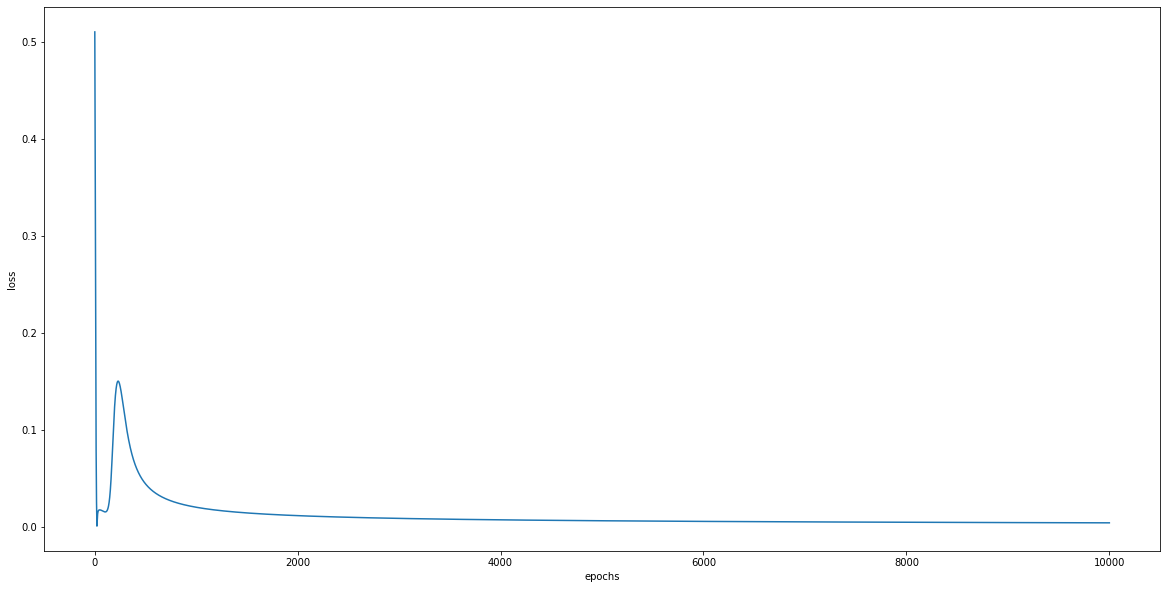

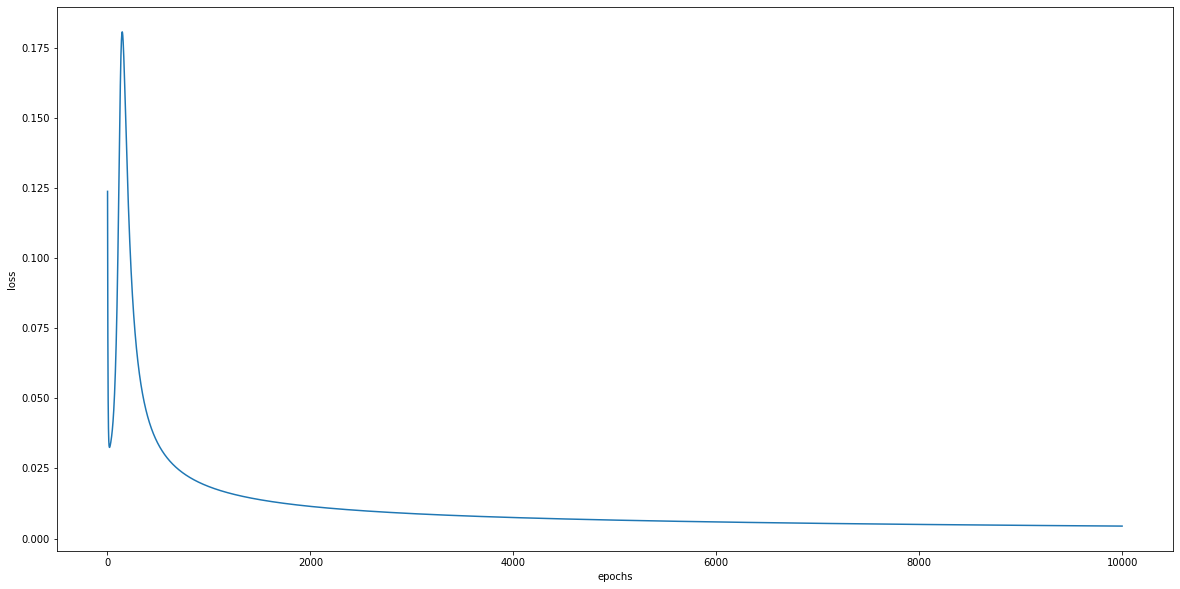

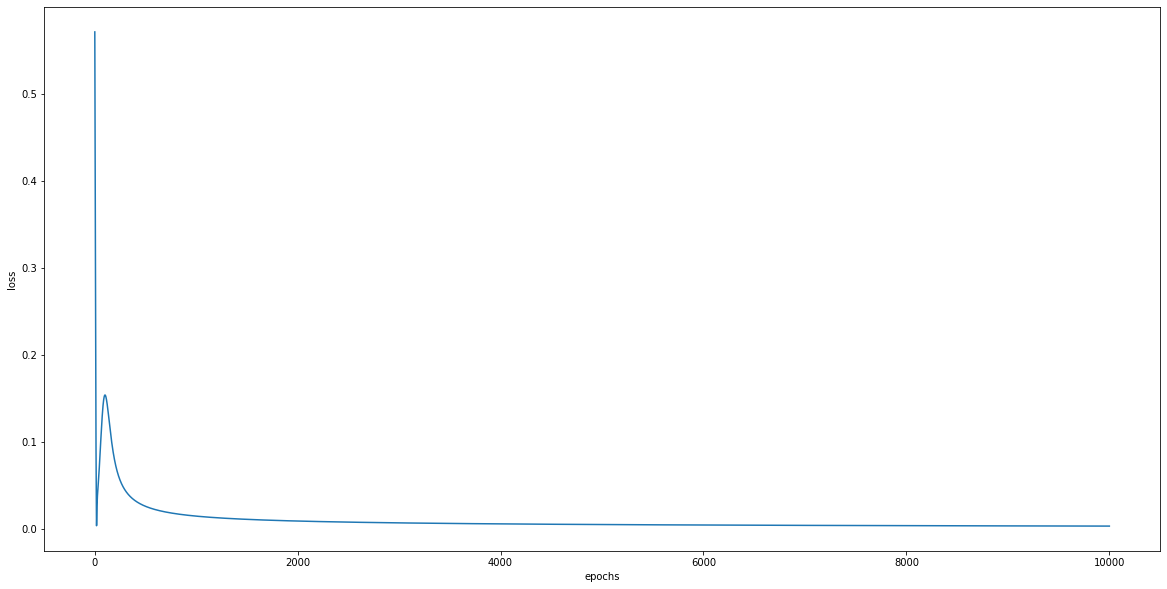

In [17]:
# NAND
loss_lr_data = []
lr_val = []

for lr in range(9):
    epochs_arr , loss = train(inputs_nand, exp_output_nand, learning_rate=(lr+1)/10)
    loss = np.absolute(loss)
    
    lr_val.append((lr+1)/10)
    loss_lr_data.append(loss[-1])
    
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20,10]
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epochs_arr, loss)
    plt.show()

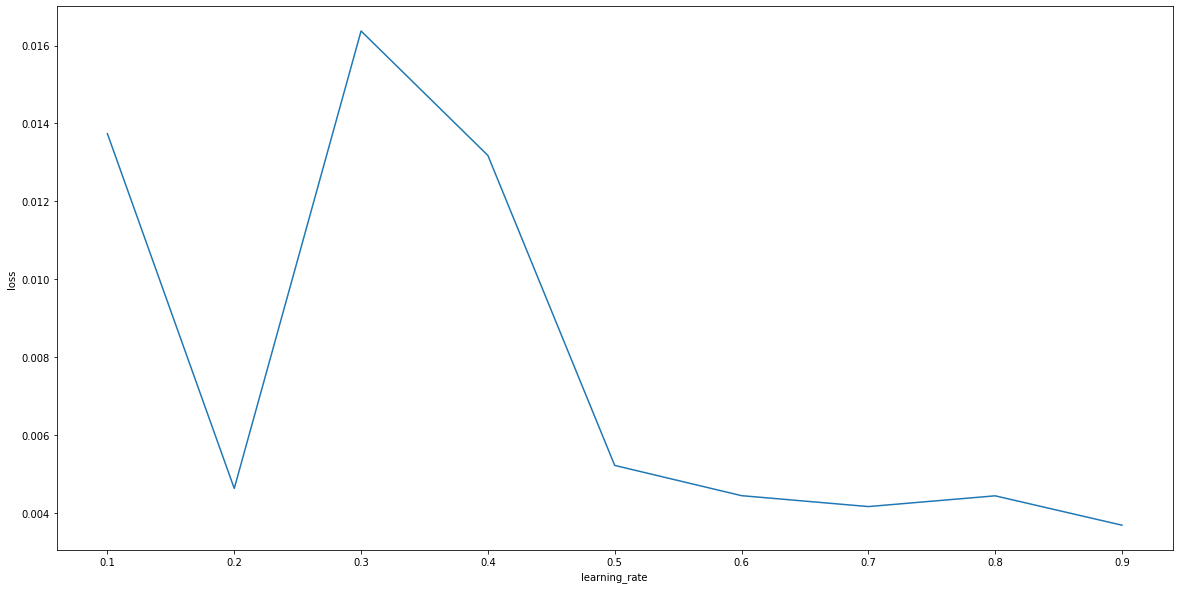

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.plot(lr_val, loss_lr_data)
plt.show() 